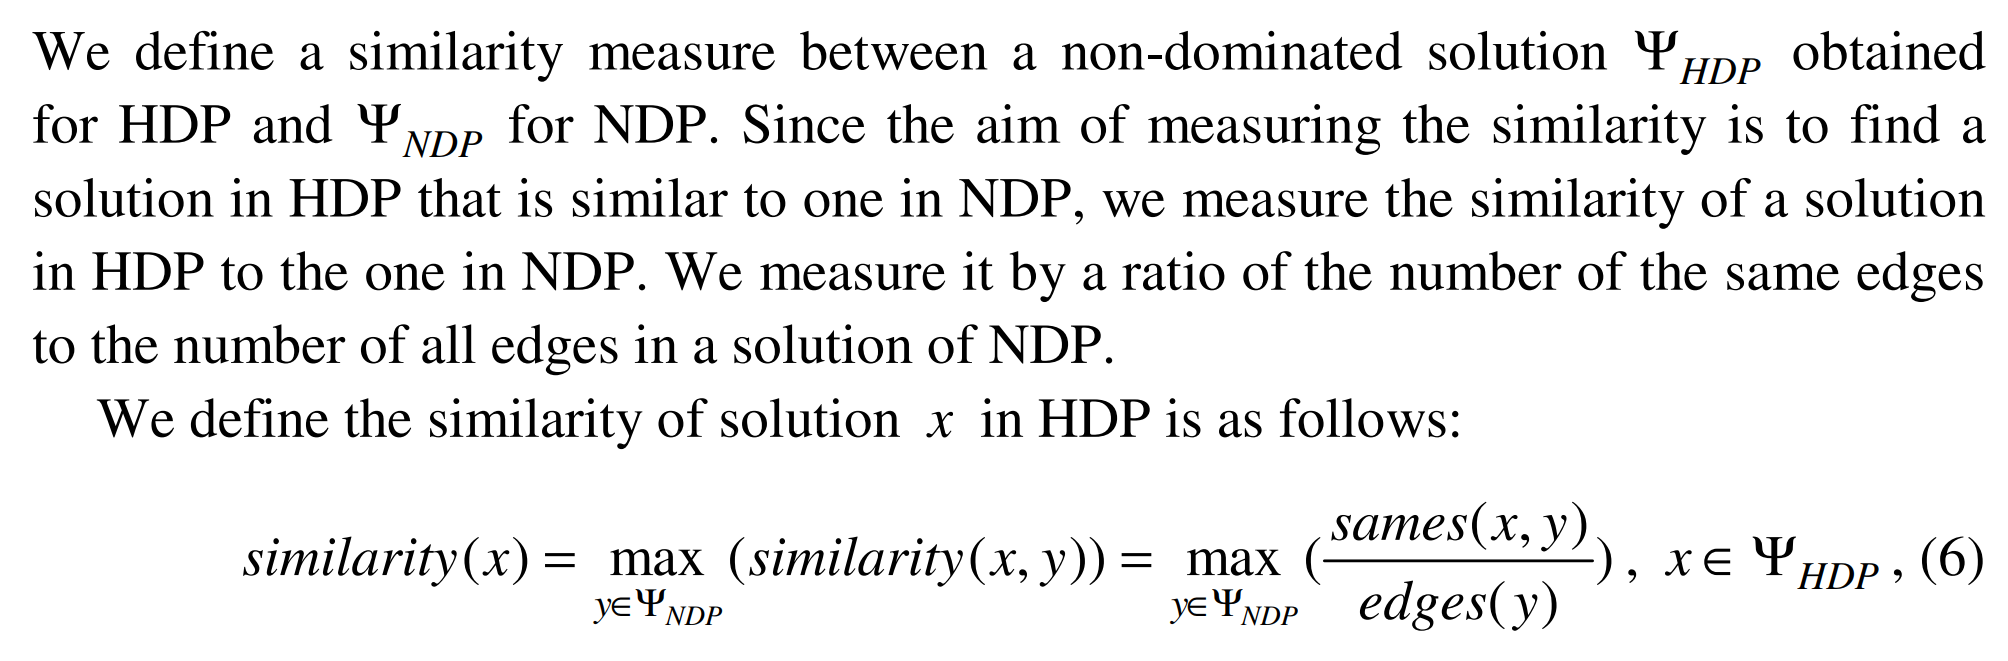
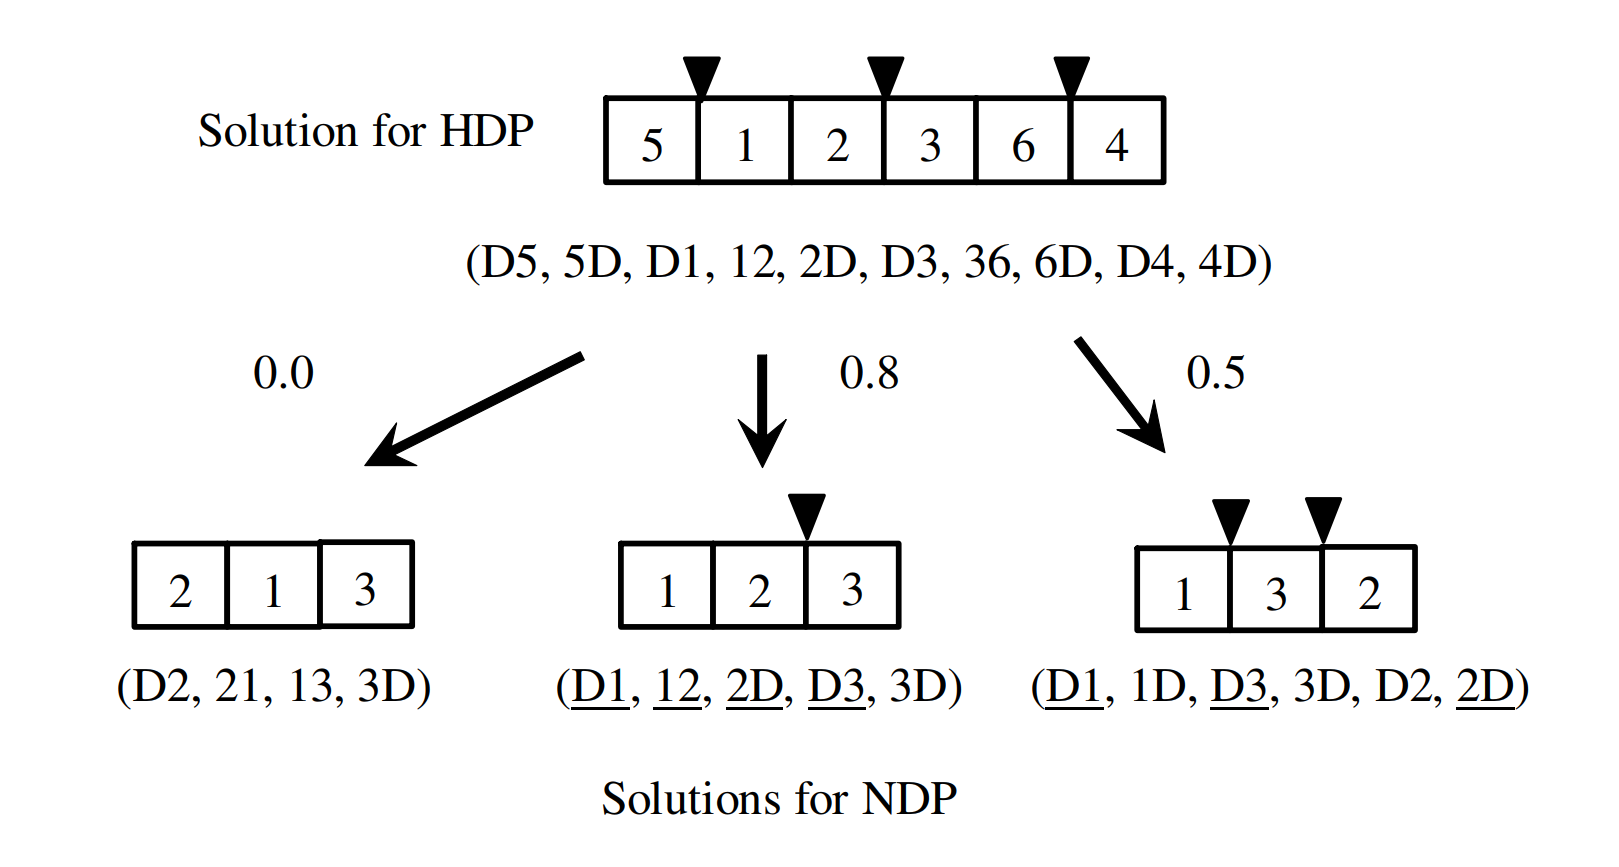

In [1]:
NDP_CUSTOMERS = 5
HDP_CUSTOMERS = 10
CARS = 2
FORCE_SAME_CAR = False


In [2]:
import numpy as np

np.random.seed(42)


ndp_customers_orders, hdp_customers_orders = [
    [np.random.permutation(customers) for _ in range(100)]
    for customers in [NDP_CUSTOMERS, HDP_CUSTOMERS]
]

ndp_customers_orders, hdp_customers_orders

([array([1, 4, 2, 0, 3]),
  array([3, 1, 2, 0, 4]),
  array([1, 0, 3, 4, 2]),
  array([0, 1, 2, 3, 4]),
  array([0, 2, 3, 1, 4]),
  array([4, 2, 0, 3, 1]),
  array([2, 0, 4, 1, 3]),
  array([1, 2, 4, 0, 3]),
  array([0, 3, 1, 4, 2]),
  array([0, 1, 2, 4, 3]),
  array([0, 1, 4, 3, 2]),
  array([1, 3, 4, 2, 0]),
  array([3, 1, 2, 0, 4]),
  array([4, 2, 1, 0, 3]),
  array([2, 3, 4, 0, 1]),
  array([0, 4, 2, 3, 1]),
  array([1, 4, 2, 0, 3]),
  array([4, 2, 1, 3, 0]),
  array([0, 2, 4, 1, 3]),
  array([2, 0, 4, 3, 1]),
  array([0, 2, 3, 4, 1]),
  array([0, 4, 2, 1, 3]),
  array([4, 2, 1, 0, 3]),
  array([2, 1, 0, 3, 4]),
  array([2, 0, 1, 3, 4]),
  array([1, 2, 0, 4, 3]),
  array([1, 3, 0, 2, 4]),
  array([3, 1, 4, 2, 0]),
  array([1, 4, 2, 3, 0]),
  array([1, 3, 4, 0, 2]),
  array([3, 1, 4, 2, 0]),
  array([4, 3, 2, 0, 1]),
  array([2, 4, 0, 1, 3]),
  array([3, 0, 1, 2, 4]),
  array([1, 3, 4, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([1, 3, 4, 0, 2]),
  array([3, 2, 0, 4, 1]),
  array([2, 

In [3]:
import numpy as np


def segment_customers_orders_by_cars(customers_orders, cars):
    customers_by_cars_solutions = [
        np.array_split(customers_order, cars) for customers_order in customers_orders
    ]
    customers_by_cars_solutions = [
        [list(car) for car in solution] for solution in customers_by_cars_solutions
    ]

    return customers_by_cars_solutions


# Simplified assignment of customer orders by cars
ndp_customers_by_cars, hdp_customers_by_cars = [
    segment_customers_orders_by_cars(customers_orders=orders, cars=CARS)
    for orders in (ndp_customers_orders, hdp_customers_orders)
]
ndp_customers_by_cars

[[[1, 4, 2], [0, 3]],
 [[3, 1, 2], [0, 4]],
 [[1, 0, 3], [4, 2]],
 [[0, 1, 2], [3, 4]],
 [[0, 2, 3], [1, 4]],
 [[4, 2, 0], [3, 1]],
 [[2, 0, 4], [1, 3]],
 [[1, 2, 4], [0, 3]],
 [[0, 3, 1], [4, 2]],
 [[0, 1, 2], [4, 3]],
 [[0, 1, 4], [3, 2]],
 [[1, 3, 4], [2, 0]],
 [[3, 1, 2], [0, 4]],
 [[4, 2, 1], [0, 3]],
 [[2, 3, 4], [0, 1]],
 [[0, 4, 2], [3, 1]],
 [[1, 4, 2], [0, 3]],
 [[4, 2, 1], [3, 0]],
 [[0, 2, 4], [1, 3]],
 [[2, 0, 4], [3, 1]],
 [[0, 2, 3], [4, 1]],
 [[0, 4, 2], [1, 3]],
 [[4, 2, 1], [0, 3]],
 [[2, 1, 0], [3, 4]],
 [[2, 0, 1], [3, 4]],
 [[1, 2, 0], [4, 3]],
 [[1, 3, 0], [2, 4]],
 [[3, 1, 4], [2, 0]],
 [[1, 4, 2], [3, 0]],
 [[1, 3, 4], [0, 2]],
 [[3, 1, 4], [2, 0]],
 [[4, 3, 2], [0, 1]],
 [[2, 4, 0], [1, 3]],
 [[3, 0, 1], [2, 4]],
 [[1, 3, 4], [0, 2]],
 [[4, 1, 3], [0, 2]],
 [[1, 3, 4], [0, 2]],
 [[3, 2, 0], [4, 1]],
 [[2, 1, 4], [3, 0]],
 [[4, 2, 0], [1, 3]],
 [[1, 0, 3], [2, 4]],
 [[1, 4, 2], [0, 3]],
 [[0, 4, 3], [1, 2]],
 [[3, 2, 0], [1, 4]],
 [[0, 2, 1], [4, 3]],
 [[4, 0, 1

In [25]:
def find_edges_including_depot(solution):
    edges = []
    for car in solution:
        if len(car) == 0:
            continue
        edges.append(["D", car[0]])
        if len(car) > 1:
            for i in range(len(car) - 1):
                edge = [car[i], car[i + 1]]
                edges.append(edge)
        edges.append([car[-1], "D"])
    return edges

In [26]:
ndp_customers_by_cars[0]

[[1, 4, 2], [0, 3]]

In [27]:
ndp_edges = find_edges_including_depot(ndp_customers_by_cars[0])
ndp_edges

[['D', 1], [1, 4], [4, 2], [2, 'D'], ['D', 0], [0, 3], [3, 'D']]

In [28]:
hdp_edges = find_edges_including_depot(hdp_customers_by_cars[0])
hdp_edges

[['D', 7],
 [7, 3],
 [3, 4],
 [4, 9],
 [9, 6],
 [6, 'D'],
 ['D', 5],
 [5, 8],
 [8, 0],
 [0, 1],
 [1, 2],
 [2, 'D']]

In [52]:
def calulate_similarity_single_pair(hdp_edges, ndp_edges):
    # Initialize a counter for similar edges
    similar_count = 0
    
    # Convert edges to sets for easier comparison
    hdp_edges_set = set(map(tuple, hdp_edges))
    ndp_edges_set = set(map(tuple, ndp_edges))
    
    # Count the number of similar edges
    similar_count = len(hdp_edges_set.intersection(ndp_edges_set))
    
    return similar_count/len(ndp_edges)


In [69]:
calulate_similarity_single_pair(hdp_edges, ndp_edges)

0.14285714285714285

In [62]:
def caclculate_similarity_hdp_to_set_ndps(hdp_solution, ndp_solutions_set):
    hdp_edges = find_edges_including_depot(hdp_solution)
    ndp_solutions_edges = [find_edges_including_depot(ndp_solution) for ndp_solution in ndp_solutions_set]
    
    # Calculate similarities using list comprehension
    similarities = [calulate_similarity_single_pair(hdp_edges, ndp_edges) for ndp_edges in ndp_solutions_edges]
    
    max_similarity = max(similarities)
    corresponding_edge = ndp_solutions_edges[similarities.index(max_similarity)]
    
    return max_similarity, corresponding_edge, hdp_edges

In [83]:
hdp_solution = hdp_customers_by_cars[-2]
hdp_solution

[[1, 9, 6, 8, 4], [3, 0, 7, 5, 2]]

In [84]:
hdp_edges = find_edges_including_depot(hdp_solution)
hdp_edges

[['D', 1],
 [1, 9],
 [9, 6],
 [6, 8],
 [8, 4],
 [4, 'D'],
 ['D', 3],
 [3, 0],
 [0, 7],
 [7, 5],
 [5, 2],
 [2, 'D']]

In [85]:
ndp_solutions_set = ndp_customers_by_cars[::3]
len(ndp_solutions_set)

34

In [86]:
ndp_solutions_set[0]

[[1, 4, 2], [0, 3]]

In [87]:
caclculate_similarity_hdp_to_set_ndps(hdp_solution, ndp_solutions_set)

(0.5714285714285714,
 [['D', 1], [1, 2], [2, 4], [4, 'D'], ['D', 3], [3, 0], [0, 'D']],
 [['D', 1],
  [1, 9],
  [9, 6],
  [6, 8],
  [8, 4],
  [4, 'D'],
  ['D', 3],
  [3, 0],
  [0, 7],
  [7, 5],
  [5, 2],
  [2, 'D']])